# Iris Species

## Why you choose this specific dataset to work on?

This Data set has three iris species with 50 samples which help to practise different classification methods and choose the suitable one for prediction

## Which is the point/question you try to solve?

apply Logistic Regression, Decision Tree & Random Forest classification method and finding the suitable method based on the accuracy score

In [1]:
#Importing Libraries & data files

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris = pd.read_csv('./iris.csv')

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
iris.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

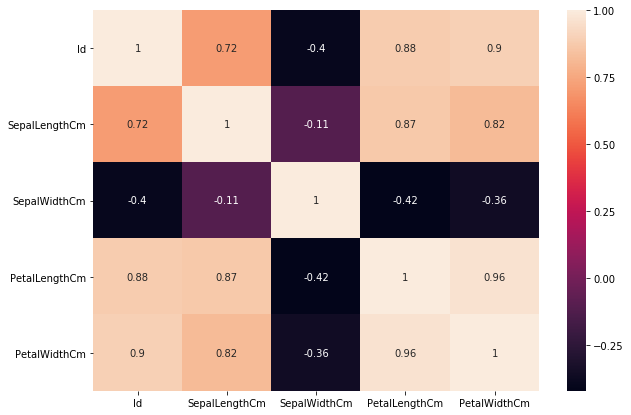

In [7]:
plt.figure(figsize=(10,7))
sns.heatmap(iris.corr(),annot=True)

In [ ]:
#Peta width & Petal Lenght has high correlation

In [20]:
#Train & Test the data
X = iris.drop(['Id','Species'],axis =1)
y = iris['Species']
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3)

In [22]:
X_train.shape

(105, 4)

In [23]:
y_train.shape

(105,)

In [24]:
y_train.head()

143     Iris-virginica
51     Iris-versicolor
89     Iris-versicolor
28         Iris-setosa
118     Iris-virginica
Name: Species, dtype: object

In [25]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [26]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_predict = lr.predict(X_test)

/Users/macos/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/macos/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [27]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 101)
dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)

In [28]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=101)
rf.fit(X_train,y_train)
rf_predict = rf.predict(X_test)

/Users/macos/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Evaluate Model

# 1. Confusion Matrix


 Heat map


Text(33.0, 0.5, 'Actual')

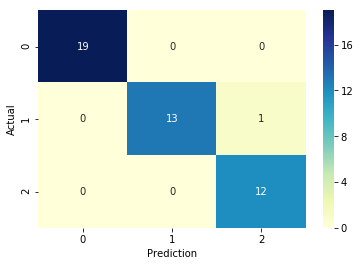

In [29]:
# Confusion Matrix results for Linear Regression model

lr_cfm =confusion_matrix(y_test,lr_predict)
print('\n Heat map')
sns.heatmap(lr_cfm,annot =True,fmt='d',cmap='YlGnBu')
plt.xlabel('Prediction')
plt.ylabel('Actual')

Text(33.0, 0.5, 'Actual')

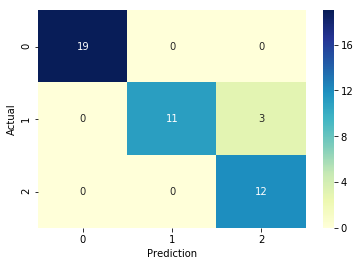

In [30]:
# Confusion Matrix for Decision Tree Model

dt_cm = confusion_matrix(y_test,dt_predict)
sns.heatmap(dt_cm,annot=True,fmt='d',cmap='YlGnBu')
plt.xlabel('Prediction')
plt.ylabel('Actual')

Text(33.0, 0.5, 'Actual')

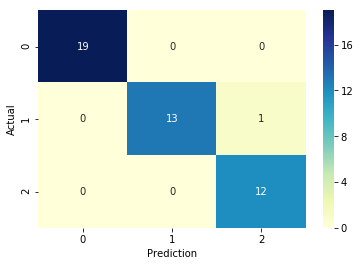

In [31]:
# Confusion Matrix for Randome forest tree model
rf_cm = confusion_matrix(y_test,rf_predict)
sns.heatmap(rf_cm,annot =True,fmt='d',cmap='YlGnBu')
plt.xlabel('Prediction')
plt.ylabel('Actual')

# 2. Classification report

In [32]:
# Classificaation report for Linear Regression model
lr_cr = classification_report(y_test,lr_predict)
print(lr_cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.92      1.00      0.96        12

      micro avg       0.98      0.98      0.98        45
      macro avg       0.97      0.98      0.97        45
   weighted avg       0.98      0.98      0.98        45



In [33]:
# Classification report for Decision Tree
dt_cr = classification_report(y_test,dt_predict)
print(dt_cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.79      0.88        14
 Iris-virginica       0.80      1.00      0.89        12

      micro avg       0.93      0.93      0.93        45
      macro avg       0.93      0.93      0.92        45
   weighted avg       0.95      0.93      0.93        45



In [34]:
# Classification report for Random Forest model
rf_cr = classification_report(y_test,rf_predict)
print(rf_cr)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.92      1.00      0.96        12

      micro avg       0.98      0.98      0.98        45
      macro avg       0.97      0.98      0.97        45
   weighted avg       0.98      0.98      0.98        45



In [35]:
# Accuracy of All the models
print('Accuracy of Liner Regression :', accuracy_score(y_test,lr_predict))
print('Accuracy of Decision Tree    :', accuracy_score(y_test,dt_predict))
print('Accuracy of Random Forest    :', accuracy_score(y_test,rf_predict))

Accuracy of Liner Regression : 0.9777777777777777
Accuracy of Decision Tree    : 0.9333333333333333
Accuracy of Random Forest    : 0.9777777777777777


# RMSE

In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_test,lr_predict)
rmse = sqrt(mse)
print('RMSE:',rmse)

ValueError: could not convert string to float: 'Iris-versicolor'